In [1]:
import numpy as np
import matplotlib.pyplot as plt
import awkward0 as awkward
import uproot3_methods as uproot_methods
import uproot3 as uproot

In [2]:
tree = uproot.open('../data/Run2012B_SingleMu_1000.root')['Events']
jet_p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(tree['Jet_pt'].array(), tree['Jet_eta'].array(), tree['Jet_phi'].array(), tree['Jet_mass'].array())
good_jet_p4 = jet_p4[jet_p4.pt > 30]
electron_p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(tree['Electron_pt'].array(), tree['Electron_eta'].array(), tree['Electron_phi'].array(), tree['Electron_mass'].array())
muon_p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(tree['Muon_pt'].array(), tree['Muon_eta'].array(), tree['Muon_phi'].array(), tree['Muon_mass'].array())
lepton_p4 = awkward.concatenate((electron_p4, muon_p4), axis=1)
good_lepton_p4 = lepton_p4[lepton_p4.pt > 10]
jet_lepton_indices = good_jet_p4.argcross(good_lepton_p4).unzip()
jet_lepton_removal_mask = good_jet_p4[jet_lepton_indices[0]].delta_r(good_lepton_p4[jet_lepton_indices[1]]) < 0.4
jet_removal_indices = jet_lepton_indices[0][jet_lepton_removal_mask]
jet_mask = good_jet_p4.pt.ones_like().astype(bool)
jet_mask[jet_removal_indices] = False
result = good_jet_p4[jet_mask].pt.sum()

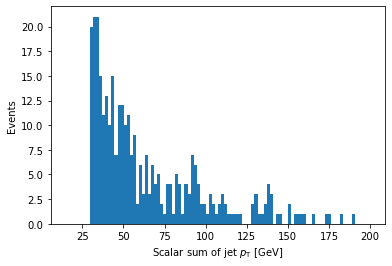

In [3]:
n, bins, _ = plt.hist(result, 100, (15, 200))
plt.xlabel(r'Scalar sum of jet $p_\mathrm{T}$ [GeV]')
plt.ylabel('Events')
plt.show()

In [4]:
np.stack((bins[:-1], bins[1:], n), axis=1)

array([[ 15.        ,  16.85000038,   0.        ],
       [ 16.85000038,  18.70000076,   0.        ],
       [ 18.70000076,  20.54999924,   0.        ],
       [ 20.54999924,  22.39999962,   0.        ],
       [ 22.39999962,  24.25      ,   0.        ],
       [ 24.25      ,  26.10000038,   0.        ],
       [ 26.10000038,  27.95000076,   0.        ],
       [ 27.95000076,  29.79999924,   0.        ],
       [ 29.79999924,  31.64999962,  20.        ],
       [ 31.64999962,  33.5       ,  21.        ],
       [ 33.5       ,  35.34999847,  21.        ],
       [ 35.34999847,  37.20000076,  15.        ],
       [ 37.20000076,  39.04999924,  11.        ],
       [ 39.04999924,  40.90000153,  13.        ],
       [ 40.90000153,  42.75      ,  10.        ],
       [ 42.75      ,  44.59999847,  15.        ],
       [ 44.59999847,  46.45000076,   7.        ],
       [ 46.45000076,  48.29999924,  12.        ],
       [ 48.29999924,  50.15000153,  12.        ],
       [ 50.15000153,  52.     